<a href="https://colab.research.google.com/github/IsaiyarasanD/Insaid-Assessment/blob/main/insaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv("/content/Fraud.csv")

In [ ]:
df1=df.copy(deep=True)

In [ ]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


**EDA**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


In [ ]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,56203.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000,56202.0
mean,7.624451,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779,0.0
std,1.999414,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000,0.0
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000,0.0


In [ ]:
missing_values=df1.isnull().sum()
print(missing_values)

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
df1['oldbalanceDest'] = df1['oldbalanceDest'].fillna(df1['oldbalanceDest'].mode()[0])
df1['newbalanceDest'] = df1['newbalanceDest'].fillna(df1['newbalanceDest'].mode()[0])
df1['isFraud'] = df1['isFraud'].fillna(df1['isFraud'].mode()[0])
df1['isFlaggedFraud'] = df1['isFlaggedFraud'].fillna(df1['isFlaggedFraud'].mode()[0])

In [ ]:
missing_values=df1.isnull().sum()
print(missing_values)

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
cols=['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']

<ipython-input-12-81c9aac8272f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap)


<Axes: title={'center': 'Correlation Graph'}>

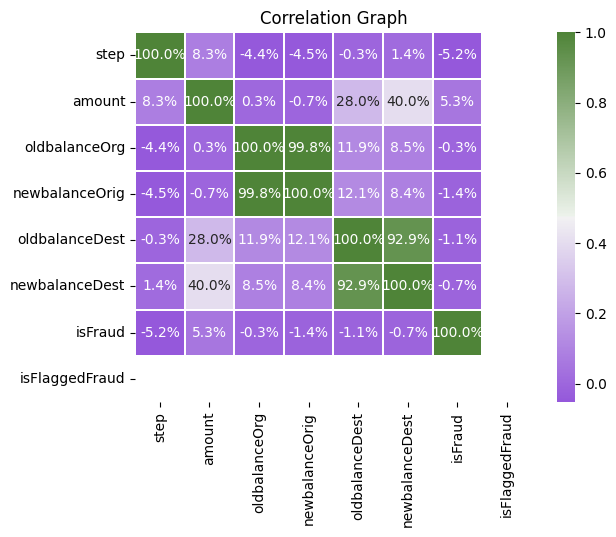

In [ ]:
plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df1[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap)

In [ ]:
df1=df1.drop(["oldbalanceOrg","oldbalanceDest"],axis=1)

In [ ]:
df1.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
# Handle outliers (assuming 'amount' is a numerical feature)
Q1 = df1['amount'].quantile(0.25)
Q3 = df1['amount'].quantile(0.75)
IQR = Q3 - Q1
data = df1[(df1['amount'] >= Q1 - 1.5 * IQR) & (df1['amount'] <= Q3 + 1.5 * IQR)]


In [ ]:
#Fraud Detection Model
selected_features=["step",	"type"	,"amount",	"nameOrig",	"newbalanceOrig",	"nameDest",	"newbalanceDest"]
target = 'isFraud'

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(df1[selected_features + [target]])
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

In [ ]:
n_estimators = multiprocessing.cpu_count()
model = RandomForestClassifier(n_estimators=n_estimators)
model.fit(X_train, y_train)

In [ ]:
feature_importances = model.feature_importances_

In [ ]:
k = 5
top_features = np.argsort(feature_importances)[-k:]
top_feature_names = data.drop(target, axis=1).columns[top_features]

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

In [ ]:
print("Key Factors for Fraud Prediction:")
for feature in top_feature_names:
    print(feature)
